<a href="https://colab.research.google.com/github/FemiAdesola/Data-Science/blob/main/Marketing_Department.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=1OjWCpwRHlCSNYaJoUUd2QGryT9CoQJ5e"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Customers Segmentation
  </td></tr>
</table>


## <ins>**Marketing Data analysis**
+ Marketing is crucial for the growth and sustainability of any business.
+ Marketers can help build the company's brand, engage customers, grow revenue, and increase sales.

+ GROWTH
  + (Marketers empower business growth by reaching new customers)
+ EDUCATION
  + (Marketers educate and communicate value proposition to customers)

+ DRIVE SALES
  + (Marketers drive sales and traffic to products/services)
+ ENGAGEMENT
  + (Marketers engage customers and understand their needs)

### <ins>**Pain point for marketer**
+ One of the key pain points for marketers is to know their customers and identify their needs.
+ By understanding the customer, marketers can launch a targeted marketing campaign that is tailored for specific needs.
+ If data about the customers is available, data science can be applied to perform market segmentation.

## <ins>**The case study**
In this case study,you have been hired as a consultant to a banking New York City.
+ The bank has extensive data on their customers for the past 6 months.
+ The marketing team at the bank wants to launch a targeted ad marketing campaign by dividing their customers into at least 3 distinctive groups.

## <ins>**The key features in the banking sector**
+ **CUSTID**: Identification of Credit Card holder
+ **BALANCE**: Balance amount left in customer's accountto make purchases
+ **BALANCE_FREQUENCY**: How frequently the Balance is
updated, score between 0 and 1(1 = frequently updated, 0 = not frequently updated)
+ **PURCHASES**: Amount of purchases made from account
+ **ONEOFFPURCHASES**: Maximum purchase amount done in one-go
+ **INSTALLMENTS_PURCHASES**: Amount of purchase done in installment
+ **CASH_ADVANCE**: Cash in advance given by the user
+ **PURCHASES_FREQUENCY**: How frequently the Purchases are being made, score between 0 and 1(1 = frequently purchased, 0 = not frequently purchased)

+ **PURCHASES_FREQUENCY**: How frequently the Purchases are being made, score between O and1(1 = frequently purchased, o = not frequently purchased)
+ **ONEOFF_PURCHASES_FREQUENCY**: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently p
urchased)
+ **PURCHASES_INSTALLMENTS_FREQUENCY**:How frequently purchases in installments are being done (1 = frequently done, 0 = not frequent
ly done)
+ **CASH ADVANCE FREQUENCY**: How frequentlythe cash in advance being paid

+ **CASH_ADVANCE_TRX**:Numberof Transactions made with "CashinAdvance"
+ **PURCHASES_TRX**: Number of purchase transactionsmade
+ **CREDIT LIMIT**: Limitof CreditCard for user
+ **PAYMENTS**: Amountof Paymentdone by user
+ **MINIMUM PAYMENTS**: Minimum amount of payments madeby user
+ **PRC_FULL_PAYMENT**: Percent of full payment paid byuser
+ **TENURE**: Tenure of credit card service for user

Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata

# <ins>**IMPORT LIBRARIES AND DATASETS**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [2]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# You have to include the full link to the csv file containing your dataset
creditcard_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Marketing-data.csv')

In [4]:
creditcard_df.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### Data description
+ Mean balance is $ \$1564$
+ Balance frequency is frequently updated on average ~0.9
+ Purchases average is $ \$1000$
+ one off purchase average is ~$600
+ Average purchases frequency is around 0.5
+ Average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low
+ Average credit limit ~ 4500
+ Percent of full payment is 15%
+ Average tenure is 11 years

In [6]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
# For seeing who made one off purchase of any amount in $!
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.25]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [8]:
# For seeing who made cash advance of $47137!

creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.211760]

# This customer made 123 cash advance transactions!!
# Never paid credit card in full

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


# <ins>**VISUALIZE AND EXPLORE DATASET**

   **For seeing if we have any missing data.**

<Axes: >

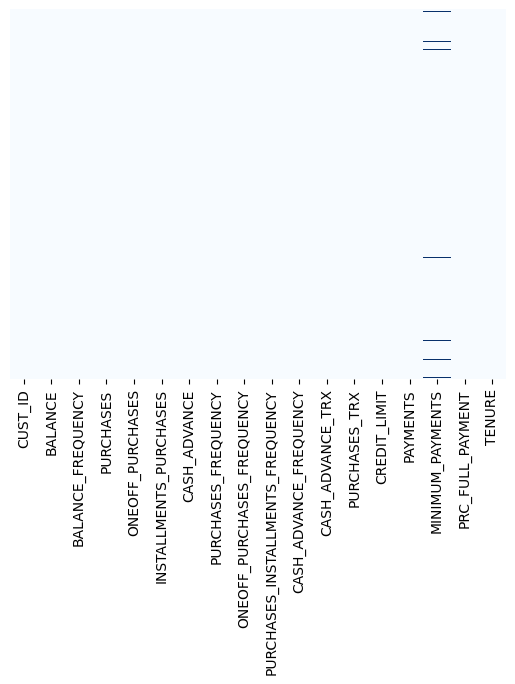

In [9]:

sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")


In [10]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

It shows that 313 MINIMUM_PAYMENTS data were missing and 1 missing from CREDIT_LIMIT  

+ Fill up missing value by using <ins>**average value**

In [11]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT'
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [12]:
# Fill up the missing elements with mean of the 'CREDIT_LIMIT'
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

<Axes: >

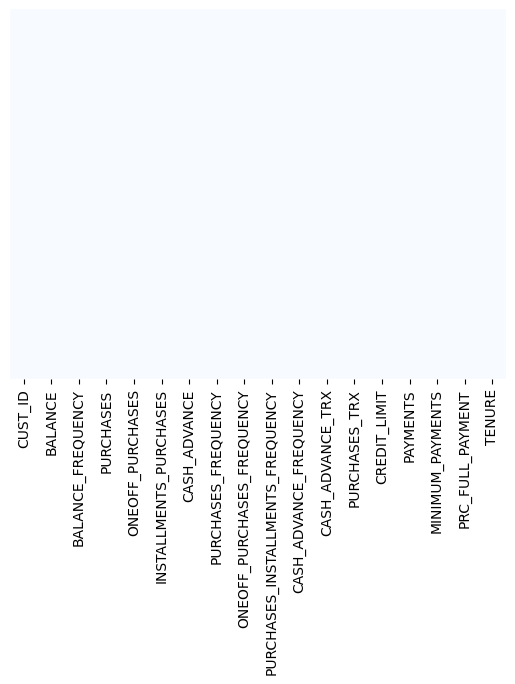

In [13]:
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [14]:
# For seeing if we have duplicated entries in the data
creditcard_df.duplicated().sum()

0

In [15]:
# For droping Customer ID since it has no meaning here
creditcard_df.drop("CUST_ID", axis = 1, inplace= True)

In [16]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [17]:
# For getting the number of columns
n = len(creditcard_df.columns)
n

17

In [18]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

### <ins>**Distplot or Histplot**

It combines the matplotlib function which can actually plot the histogram and plot as well as the seaborn KDE plot.

+ KDE Plot represents the Kernel Density Estimate
+ KDE is used for visualizing the Probability Density of a continuous variable.
+ KDE demonstrates the probability density at different values in a continuous variable.

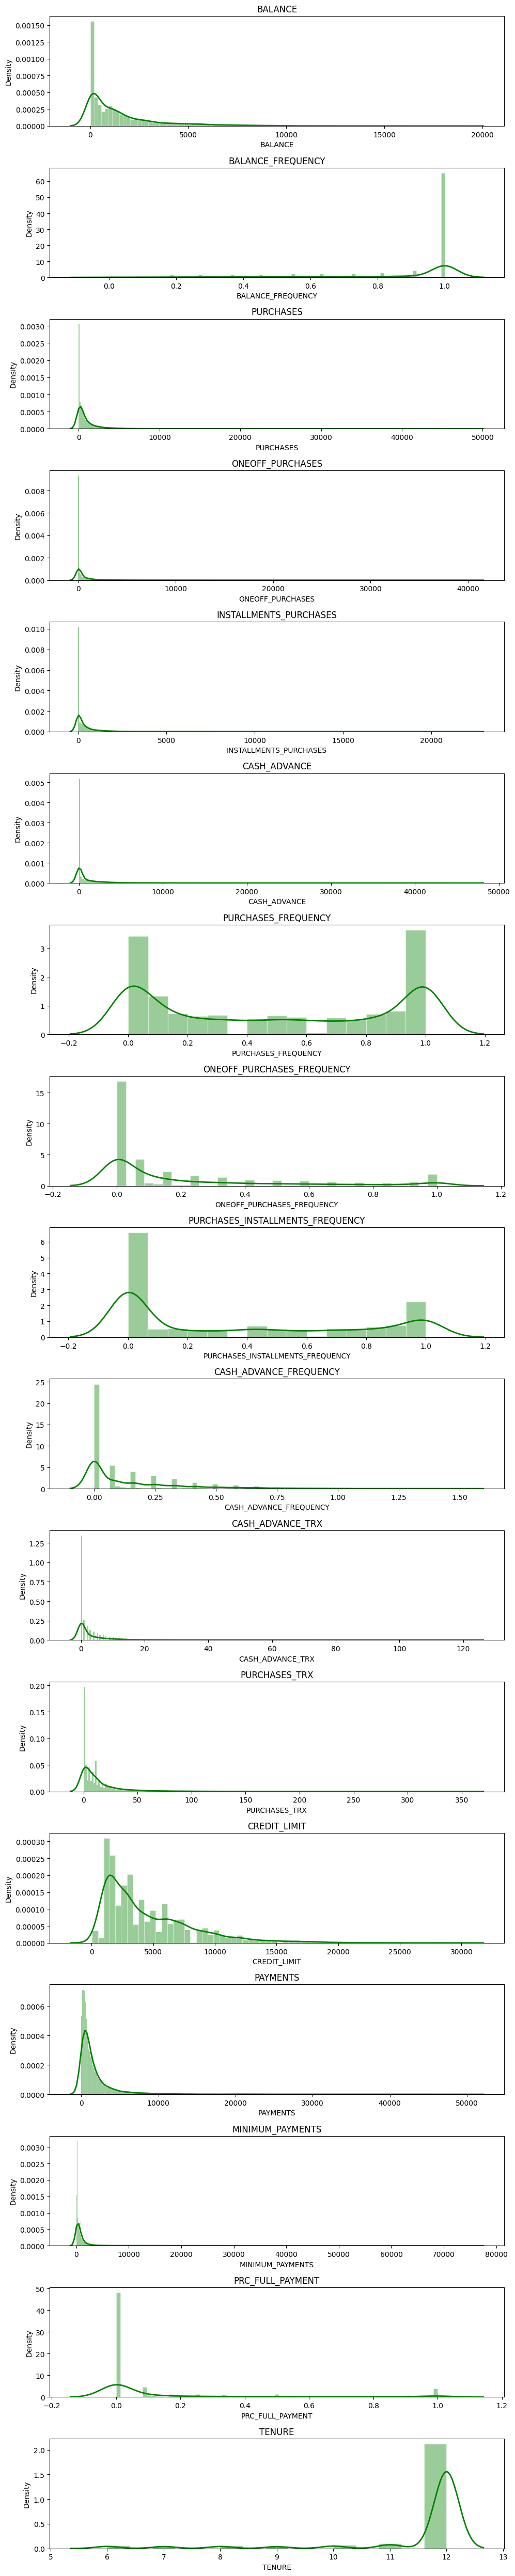

In [19]:
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i+1)
  sns.histplot(creditcard_df[creditcard_df.columns[i]],
               kde=True,
               stat="density",
               kde_kws=dict(cut=3),
                color='g',
               alpha=.4, edgecolor=(1, 1, 1, .4),
               line_kws={'lw': 2}
               )
  plt.title(creditcard_df.columns[i])

plt.tight_layout()

### Outcome of KDE result shows below
+ Mean of balance is $ \$1500$
+ 'Balance_Frequency' for most customers is updated frequently ~1
+ For 'PURCHASES_FREQUENCY', there are two distinct group of customers
+ For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently
+ Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0
+ Credit limit average is around $4500
+ Most customers are ~11 years tenure

### <ins>**For plotting Correlation**

+ sns.pairplot(creditcard_df)
+ Correlation between 'PURCHASES' and ONEOFF_PURCHASES & INSTALMENT_PURCHASES
+ Trend between 'PURCHASES' and 'CREDIT_LIMIT' & 'PAYMENTS'

In [20]:
correlations = creditcard_df.corr(numeric_only = [True])

<Axes: >

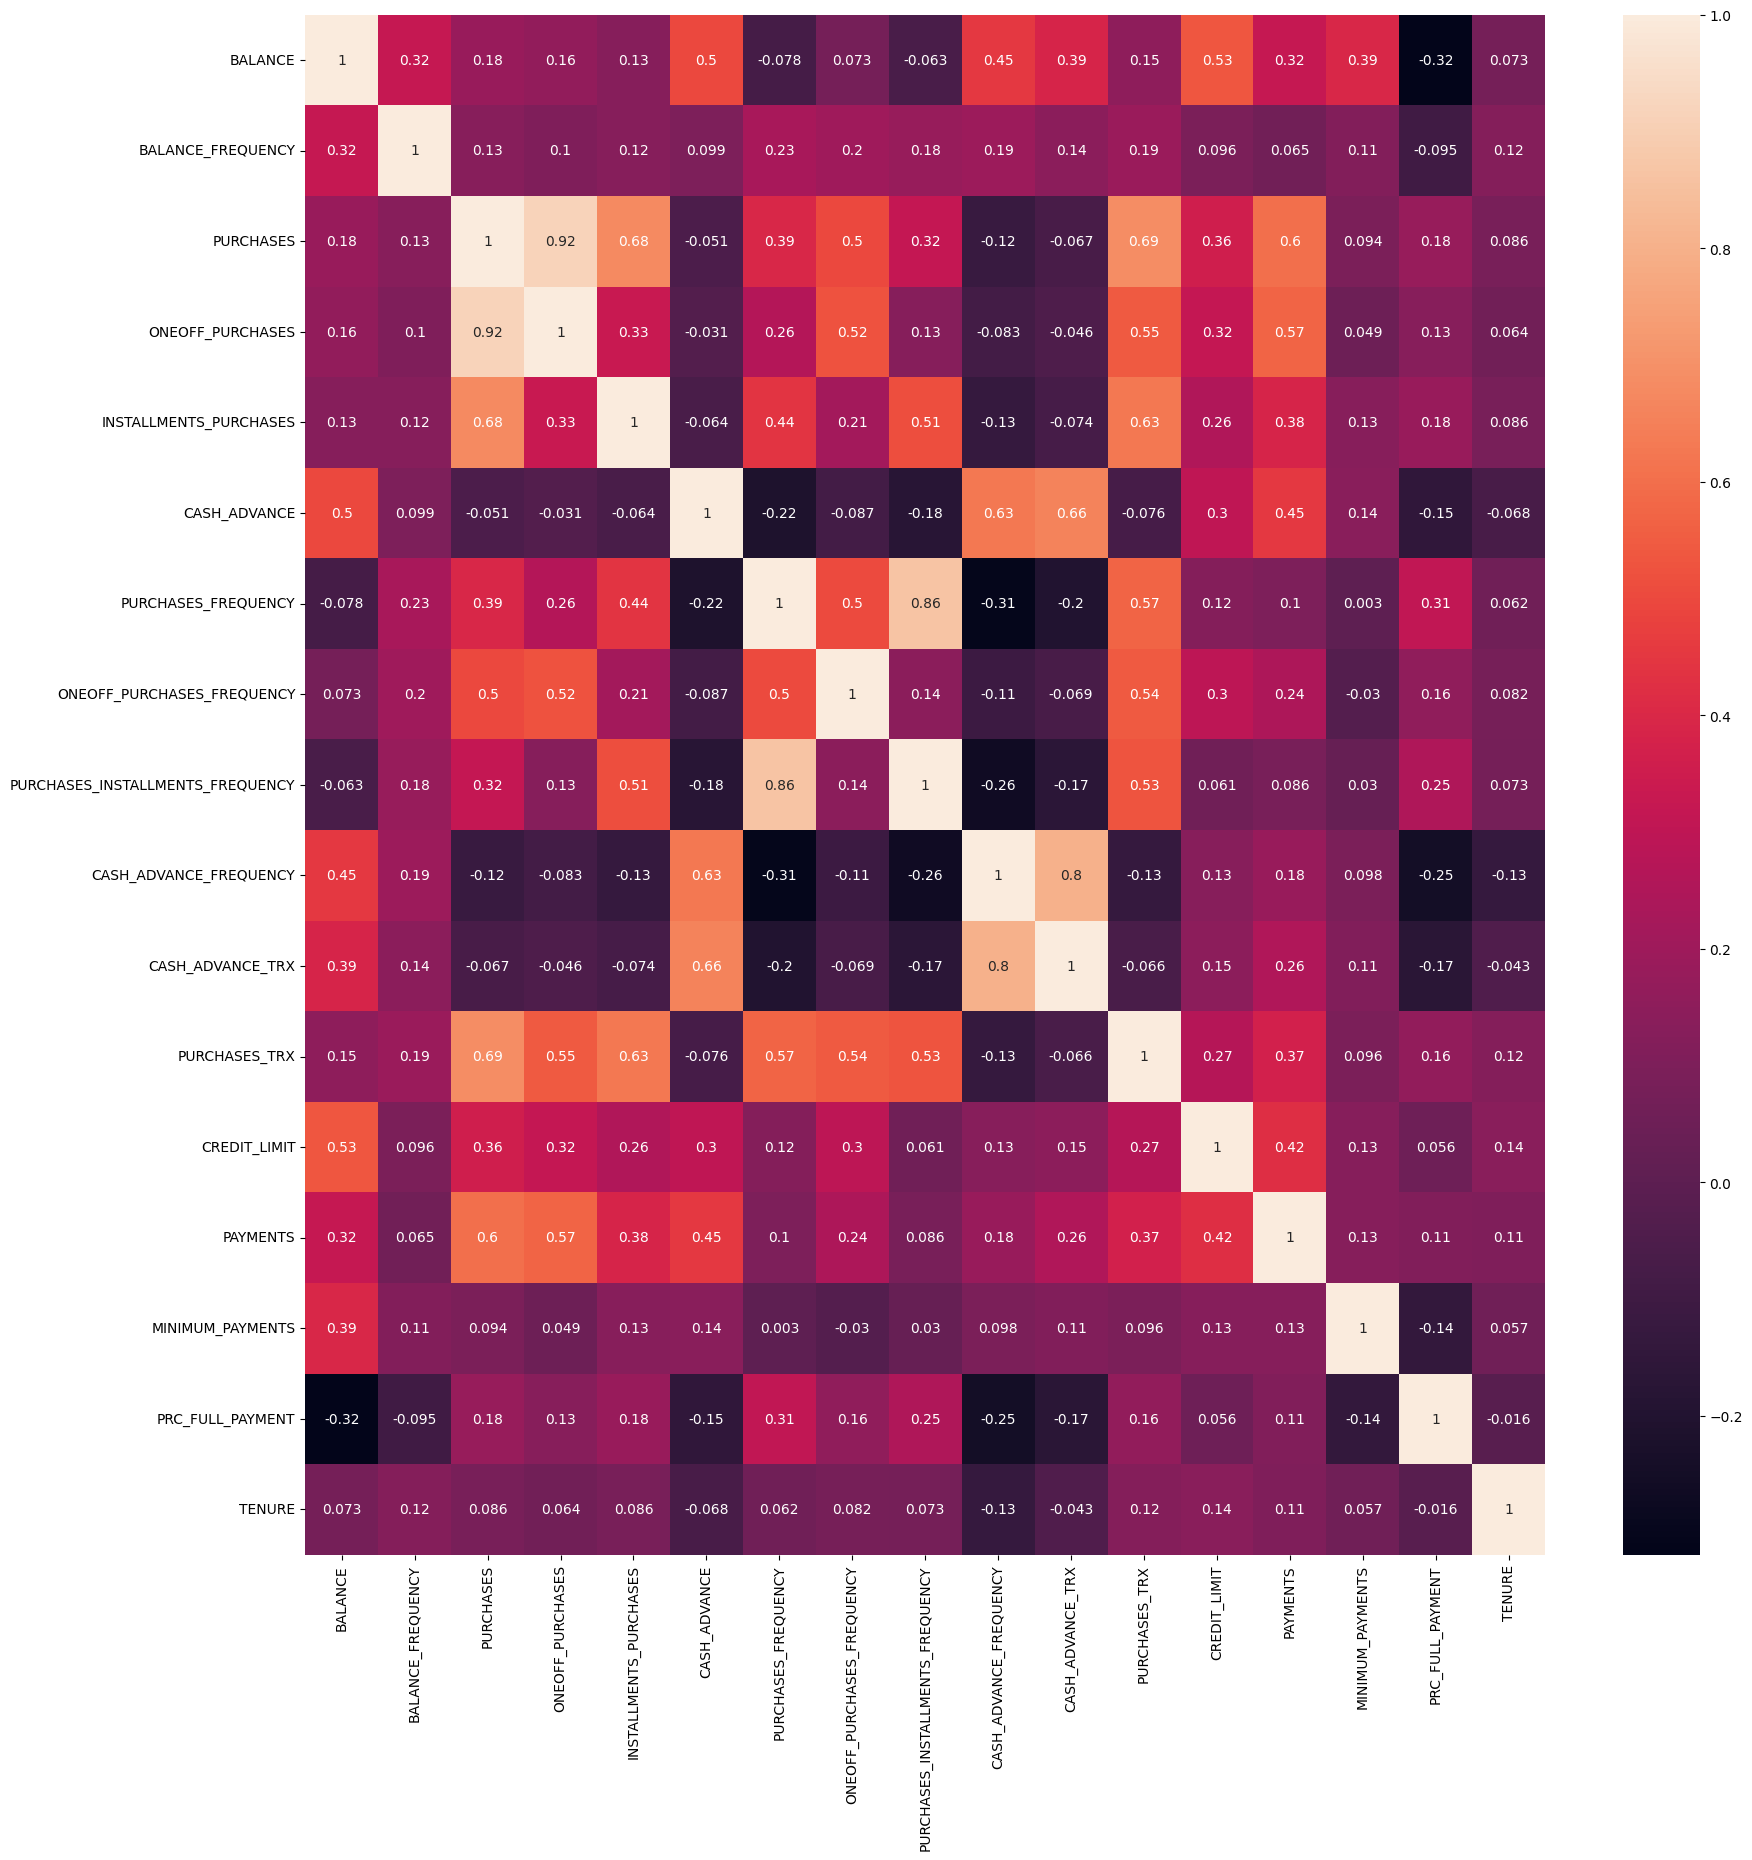

In [21]:
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

# 'PURCHASES' have high correlation between one-off purchases, 'installment purchases, purchase transactions, credit limit and payments.
# Strong Positive Correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'


# <ins>**UNDERSTAND THE THEORY AND INTUITON BEHIND K-MEANS**

### K-MEANS INTUITION
+ K-means is an unsupervised learning algorithm (clustering).
+ K-means works by grouping some data points together (clustering) in an unsupervised fashion.
+ The algorithm groups observations with similar attribute values together by measuring the Euclidian distance between points.

![alt text](https://drive.google.com/uc?id=1EBCmP06GuRjVfPgTfH85Yhv9xIAZUj-K)

### <ins>**K-MEANS ALGORITHM STEPS**
1. Choose number of clusters "K"
2. Selectrandom K points that are going to be the centroids for each cluster
3. Assign each data point to the nearest centroid, doing so will enable us to create "K" number of clusters
4. Calculate a new centroid for each cluster
5. Reassign each data point to the new closest centroid
6. Go to step 4 and repeat.

![alt text](https://drive.google.com/uc?id=1ppL-slQPatrmHbPBEaT3-8xNH01ckoNE)

![alt text](https://drive.google.com/uc?id=1Yfi-dpWW3keU5RLgwAT4YmQ2rfY1GxUh)

![alt text](https://drive.google.com/uc?id=1bLRDIZRda0NSTAdcbugasIjDjvgw4JIU)

![alt text](https://drive.google.com/uc?id=1rBQziDU0pS1Fz0m8VQRjQuBoGFSX1Spb)

![alt text](https://drive.google.com/uc?id=1BOX2q8R_8E4Icb4v1tpn1eymCTJY2b5o)

![alt text](https://drive.google.com/uc?id=1v7hJEPiigSeTTaYo0djbO-L4uEnTpcAU)

# <ins>**FIND THE OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD**

- The elbow method is a heuristic method of interpretation and validation of consistency within cluster analysis designed to help find the appropriate number of clusters in a dataset.
- If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best.
- Source:
  - https://en.wikipedia.org/wiki/Elbow_method_(clustering)
  - https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [22]:
# For scaling the data first
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [23]:
creditcard_df_scaled.shape

(8950, 17)

In [24]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [25]:
#initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

scores_1 = []

range_values = range(1, 20)

for k in range_values:
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(creditcard_df_scaled)
  scores_1.append(kmeans.inertia_)

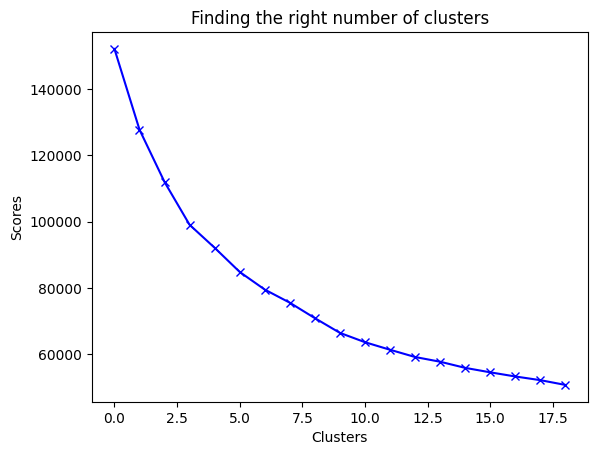

In [26]:
plt.plot(scores_1, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores')
plt.show()


+ From this we can observe that, 4th cluster seems to be forming the elbow of the curve.
+ However, the values does not reduce linearly until 8th cluster.
+ Let's choose the number of clusters to be 7.

# <ins>**APPLY K-MEANS METHOD**

In [27]:

#initialize kmeans parameters
kmeans_kwargs = {
"init": 'k-means++',
"n_init": 10,
}


kmeans = KMeans(8, **kmeans_kwargs)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [28]:
kmeans.cluster_centers_.shape

(8, 17)

In [29]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.649795,0.394494,-0.227046,-0.161848,-0.239568,1.986449,-0.491878,-0.215248,-0.430425,1.913132,1.907887,-0.277829,1.003251,0.784363,0.510888,-0.395370,0.065298
1,0.009816,0.403125,-0.357910,-0.243110,-0.399526,-0.102924,-0.854739,-0.401403,-0.751754,0.090431,-0.038612,-0.482495,-0.308536,-0.254105,-0.010942,-0.457771,0.273236
2,0.996968,0.466567,2.272719,1.707196,2.237443,-0.173739,1.161010,1.520805,1.265788,-0.287958,-0.174271,2.835553,1.240342,1.303894,0.654972,0.228453,0.338429
3,-0.344848,-0.347465,-0.286811,-0.213813,-0.284986,0.055996,-0.191113,-0.284499,-0.215012,0.299342,-0.003872,-0.384653,-0.570454,-0.393236,-0.210462,0.019809,-3.193797
4,-0.701776,-2.149174,-0.312422,-0.237562,-0.302158,-0.319280,-0.557078,-0.446624,-0.439048,-0.520450,-0.375848,-0.419898,-0.176332,-0.193837,-0.256363,0.285060,0.200058
5,-0.174177,0.392938,0.498569,0.641691,-0.000195,-0.338373,0.959131,1.911813,0.103505,-0.423583,-0.338027,0.555370,0.395507,0.115710,-0.167522,0.457920,0.265814
6,-0.362690,0.333629,-0.034255,-0.240437,0.360542,-0.362018,0.996774,-0.377581,1.210915,-0.470489,-0.357324,0.194487,-0.254780,-0.213062,-0.054049,0.313551,0.260254
7,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044064,8.098975,1.120318,1.110132,0.310863


In [30]:
# In order to understand what these numbers mean, let's perform inverse transformation

cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,4998.383779,0.970723,518.117324,323.802251,194.428925,5144.547731,0.292936,0.138245,0.193375,0.517981,16.268757,7.804031,8144.685941,4003.798509,2054.810598,0.038076,11.604703
1,1584.905542,0.972767,238.523855,188.924534,49.780862,763.034130,0.147303,0.082711,0.065671,0.153240,2.985326,2.716801,3371.869650,997.534110,838.706255,0.019824,11.882979
2,3639.580373,0.987796,5858.904069,3426.033747,2434.359156,614.532727,0.956320,0.656143,0.867494,0.077521,2.059553,85.191067,9007.320099,5507.788615,2390.591822,0.220533,11.970223
3,846.702822,0.794959,390.429472,237.550976,153.358496,1096.297887,0.413648,0.117586,0.278986,0.195046,3.222400,5.148800,2418.903119,594.764596,373.732948,0.159509,7.243200
4,103.787801,0.368151,335.709907,198.132396,137.829677,309.326972,0.266768,0.069221,0.189949,0.030997,0.683942,4.272727,3852.879732,1172.004146,266.764094,0.237090,11.785047
5,1201.940215,0.970354,2068.404747,1657.513744,410.891003,269.287324,0.875296,0.772789,0.405573,0.050381,0.942042,28.514259,5933.465752,2068.111617,473.802634,0.287648,11.873045
6,809.566357,0.956304,930.018930,193.362011,737.101558,219.702798,0.890404,0.089818,0.845686,0.040995,0.810353,19.544052,3567.456547,1116.350448,738.248510,0.245423,11.865605
7,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333



+ First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance $ (\$104)$ and cash advance $ (\$303)$, Percentage of full payment = 23%
+ Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance $ (\$5000)$ and cash advance ~$ (\$5000)$, low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
+ Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits
+ Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance


In [31]:
labels.shape # for getting the shape

(8950,)

In [32]:
labels.max()

7

In [33]:
labels.min()

0

In [34]:
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
y_kmeans

array([1, 7, 4, ..., 5, 5, 5], dtype=int32)

**concatenate the clusters labels to our original dataframe**

In [35]:

# concatenate the clusters labels to our original dataframe
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()



,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,5
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


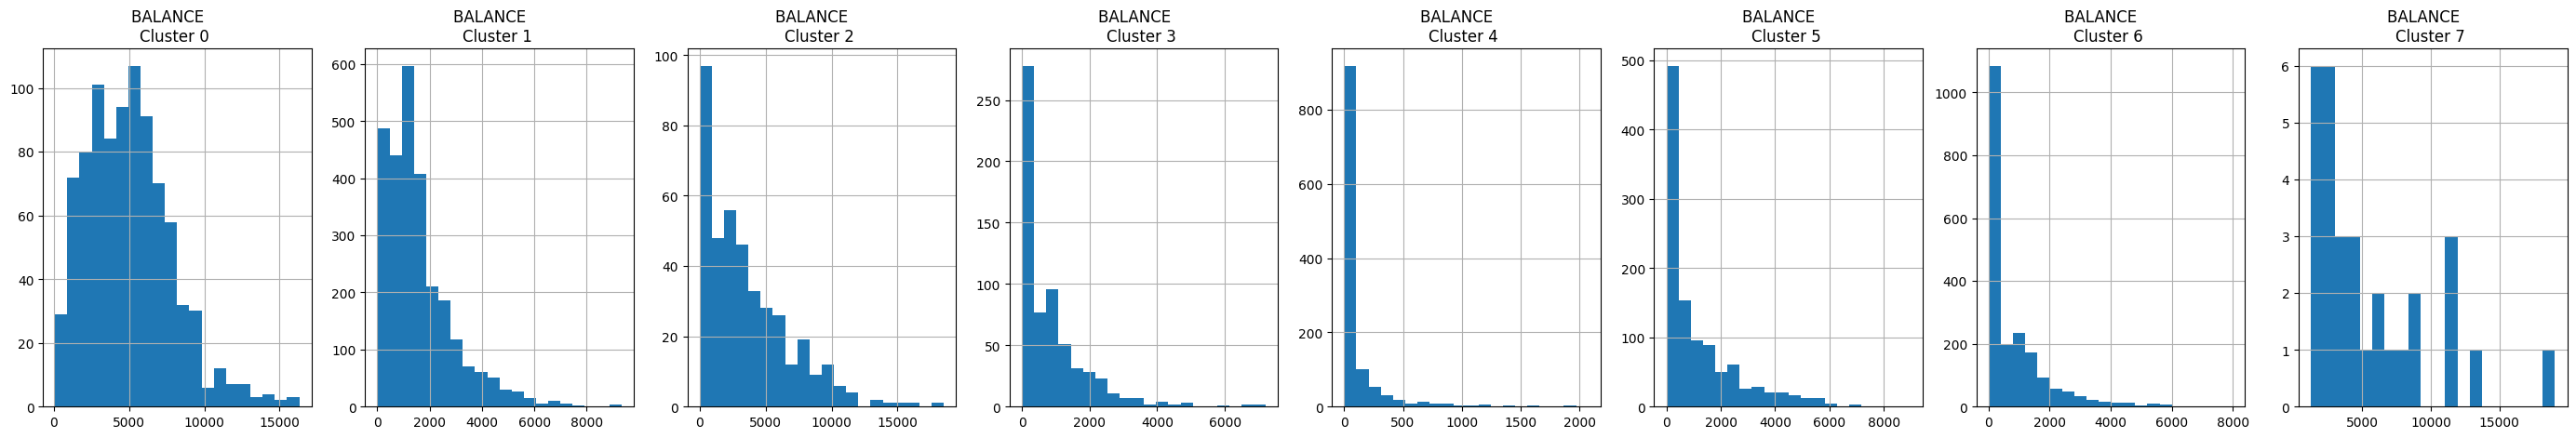

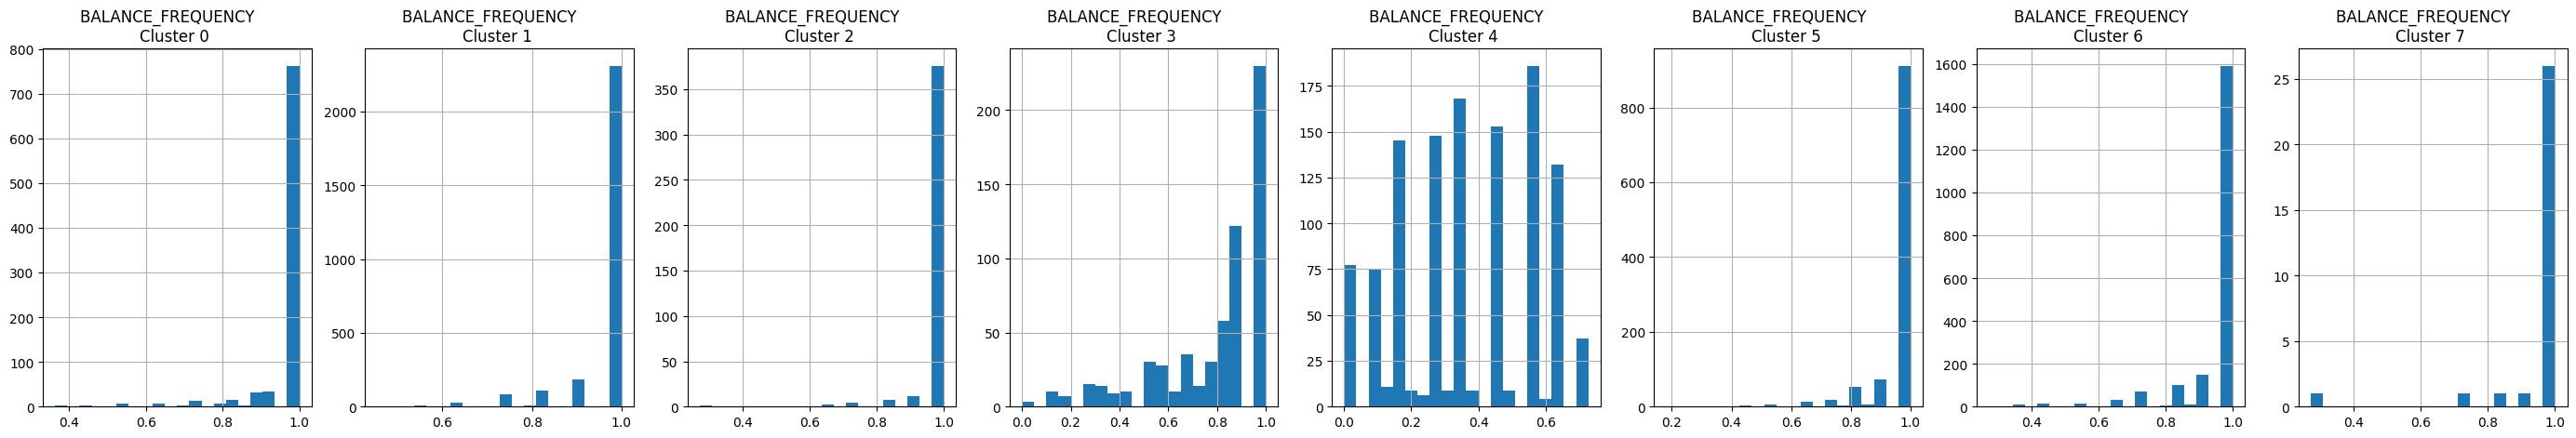

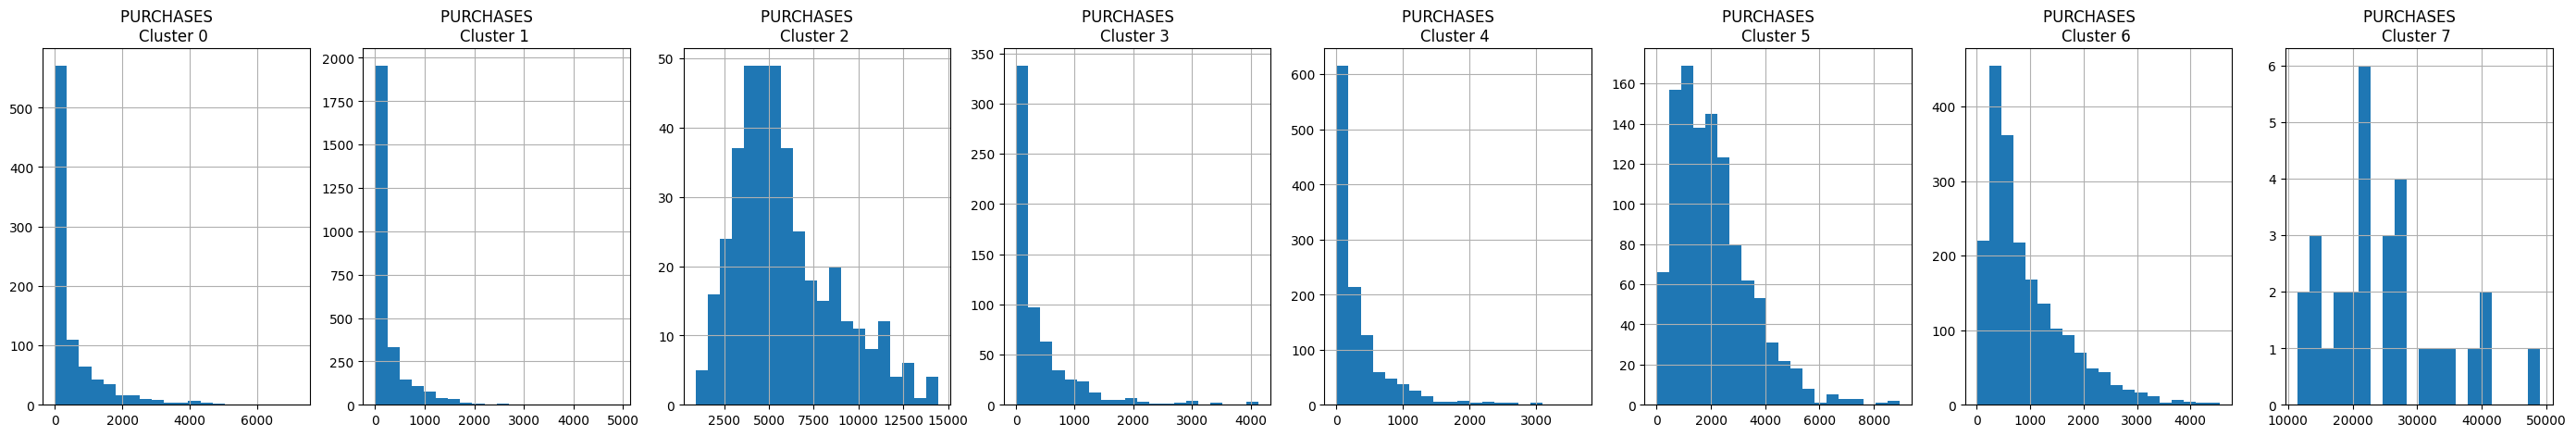

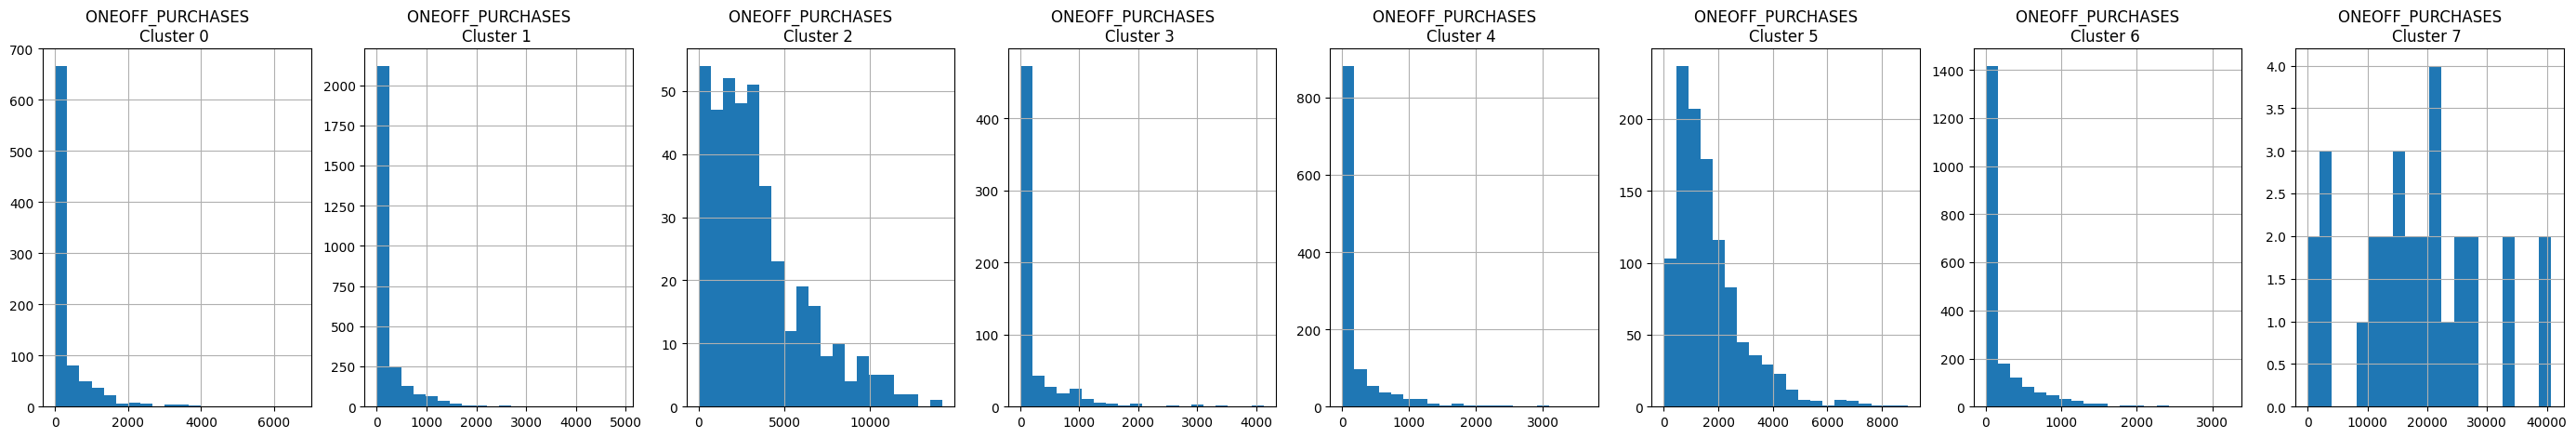

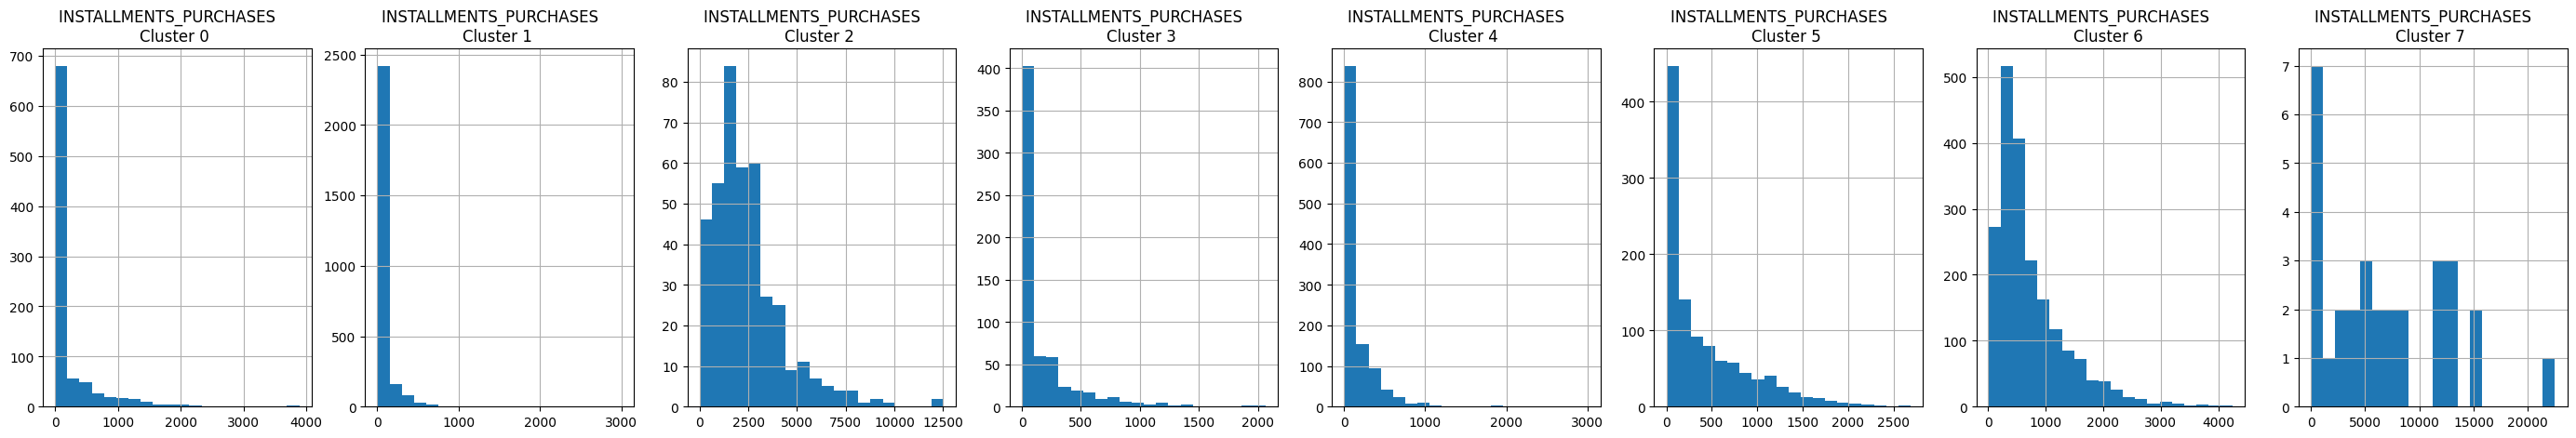

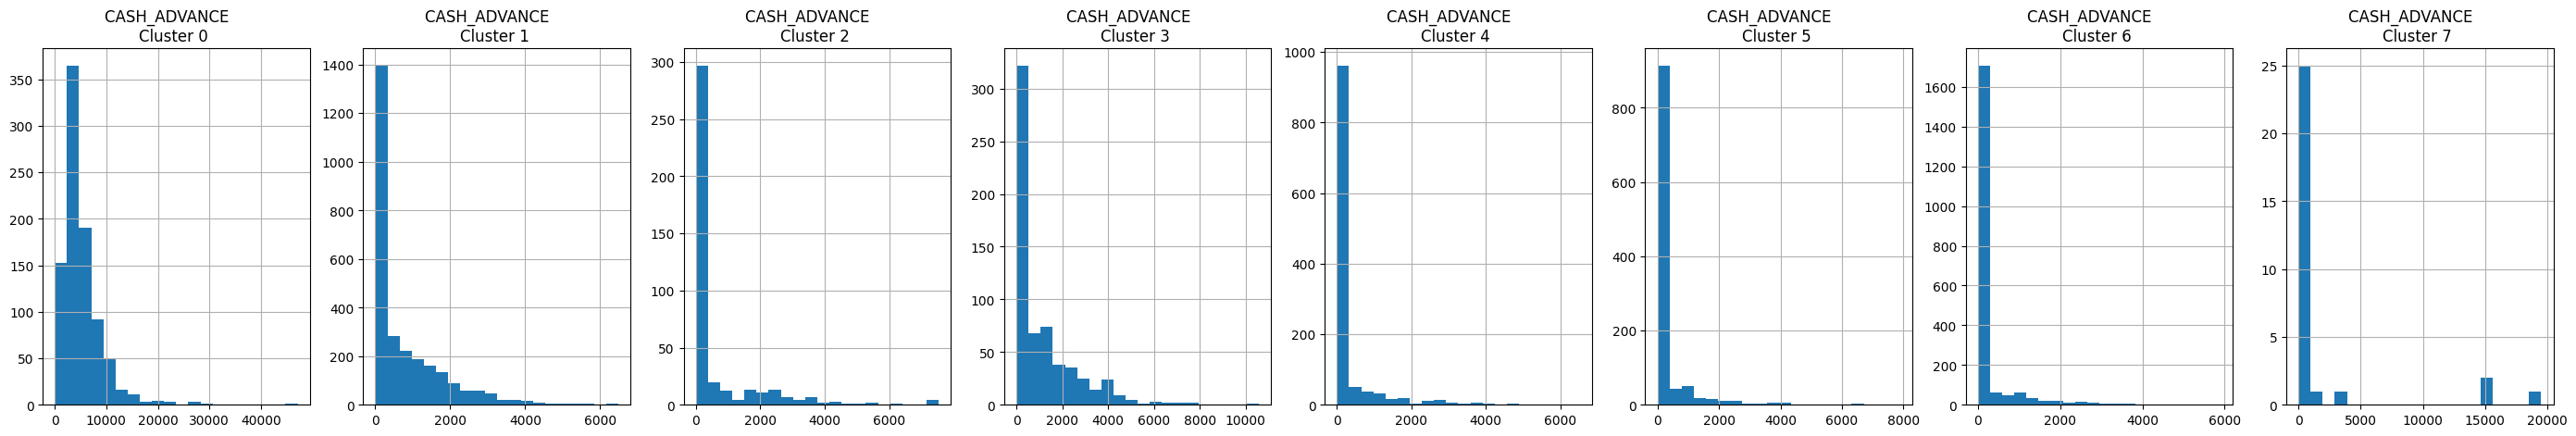

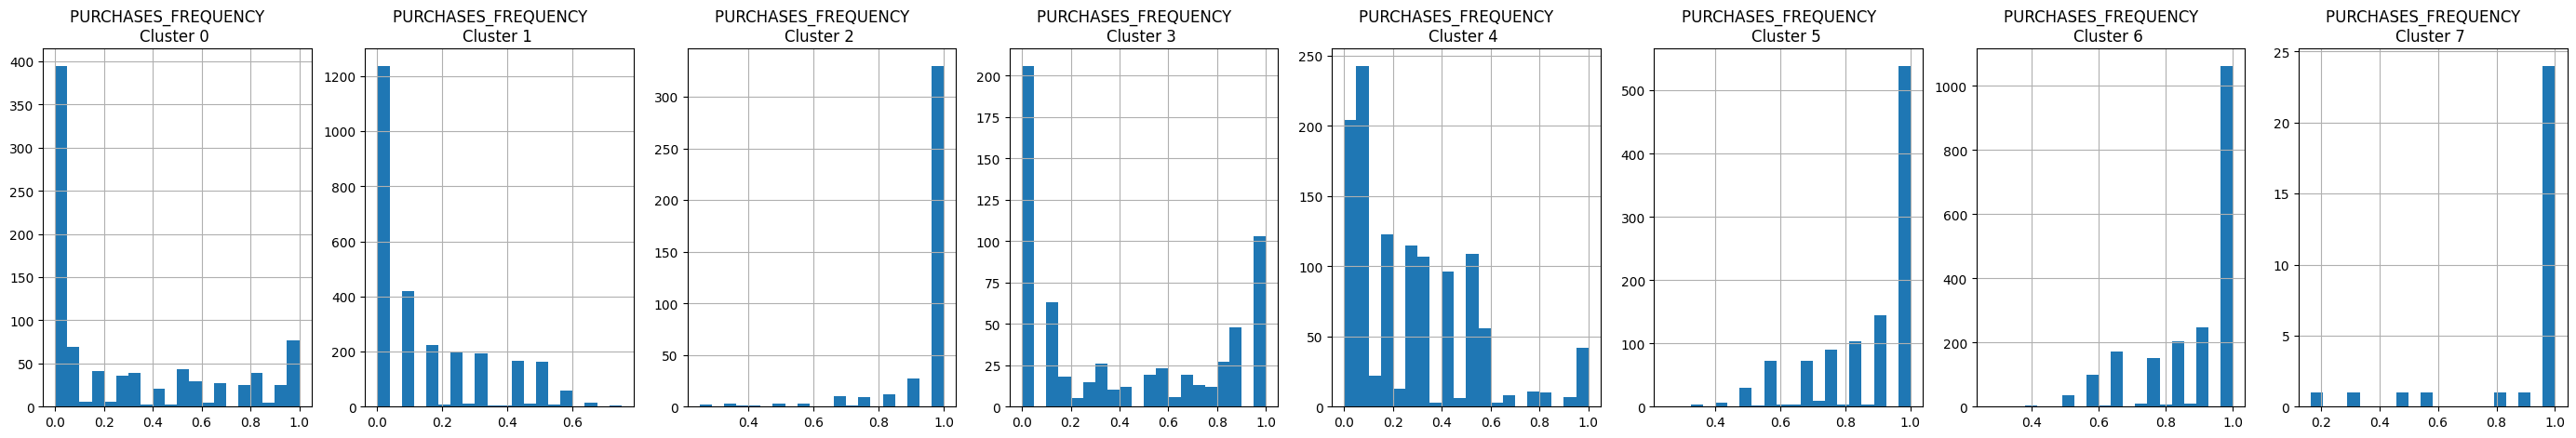

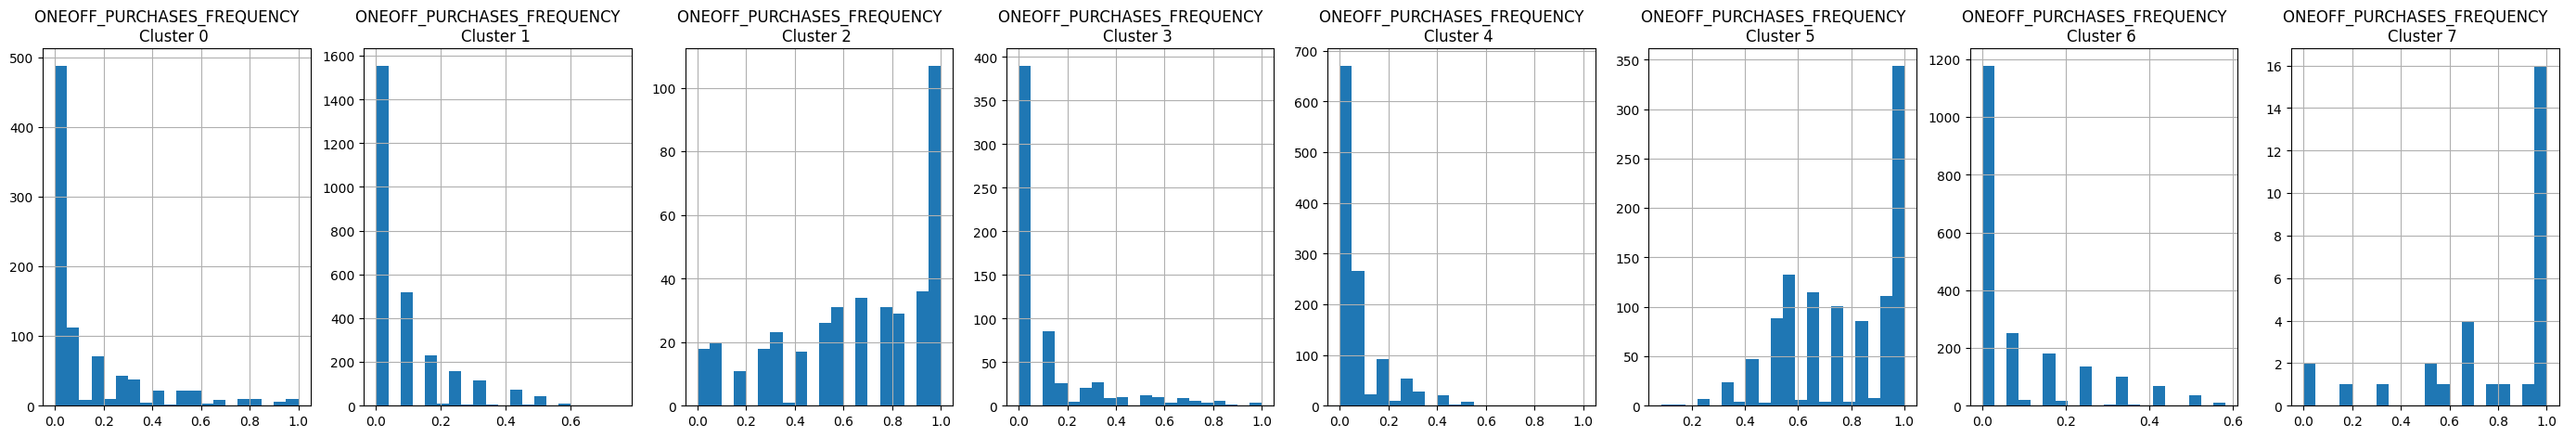

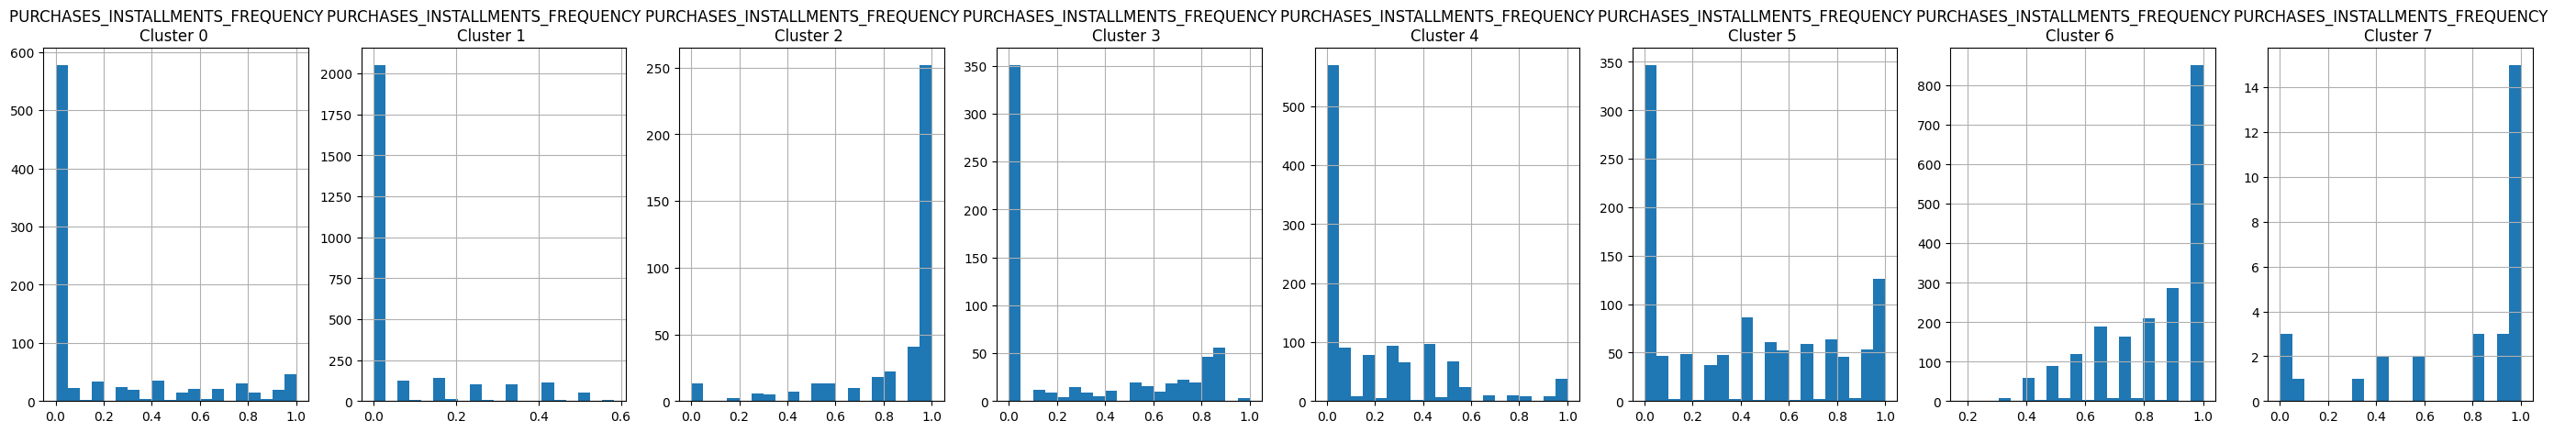

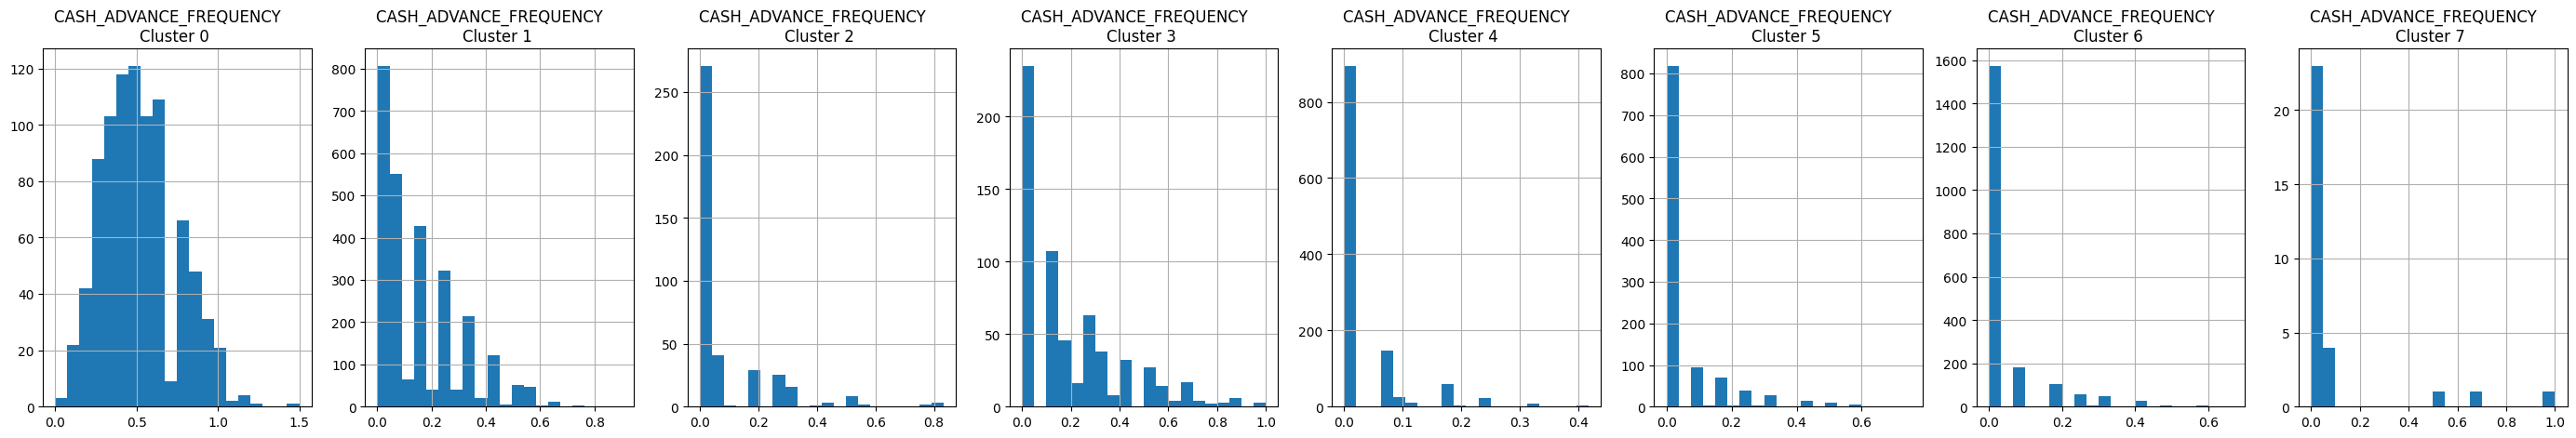

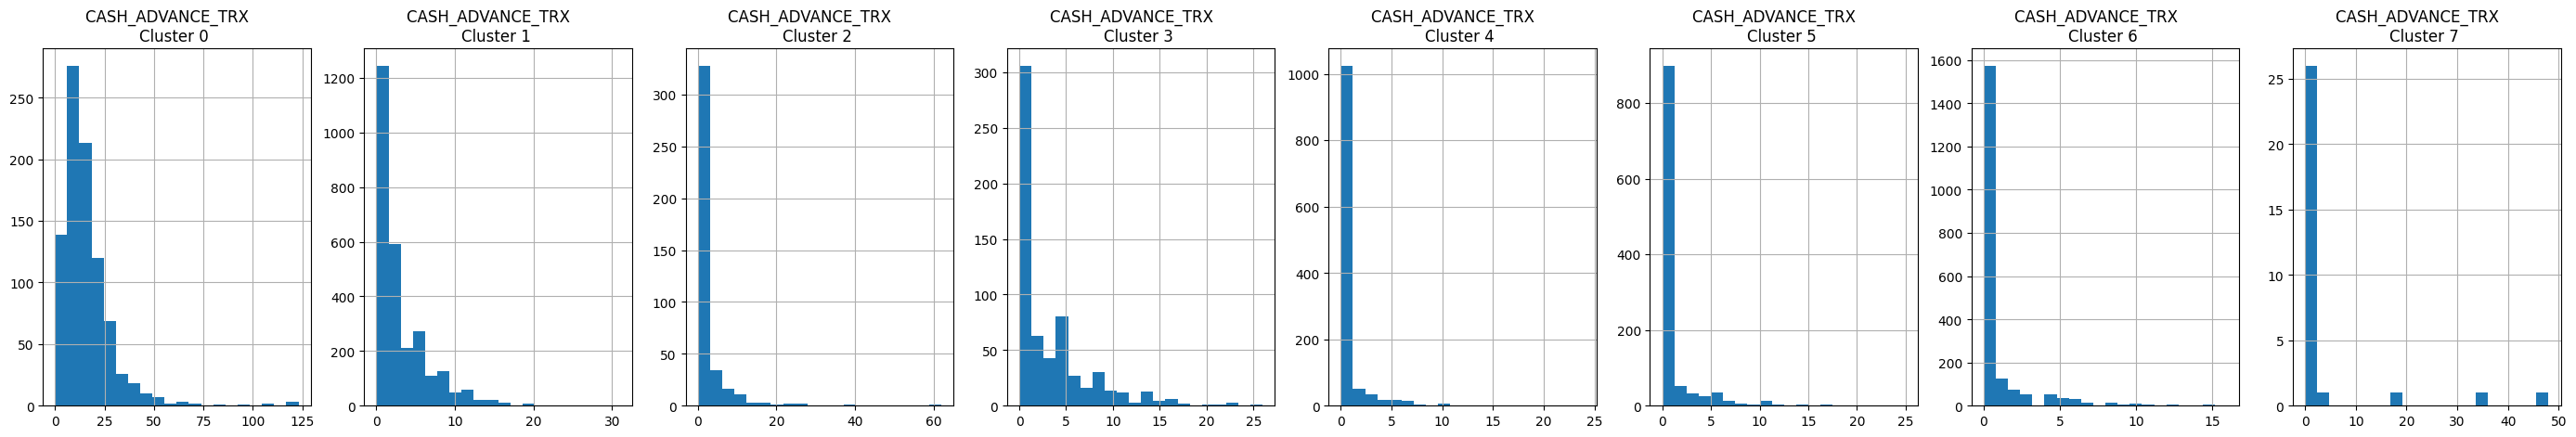

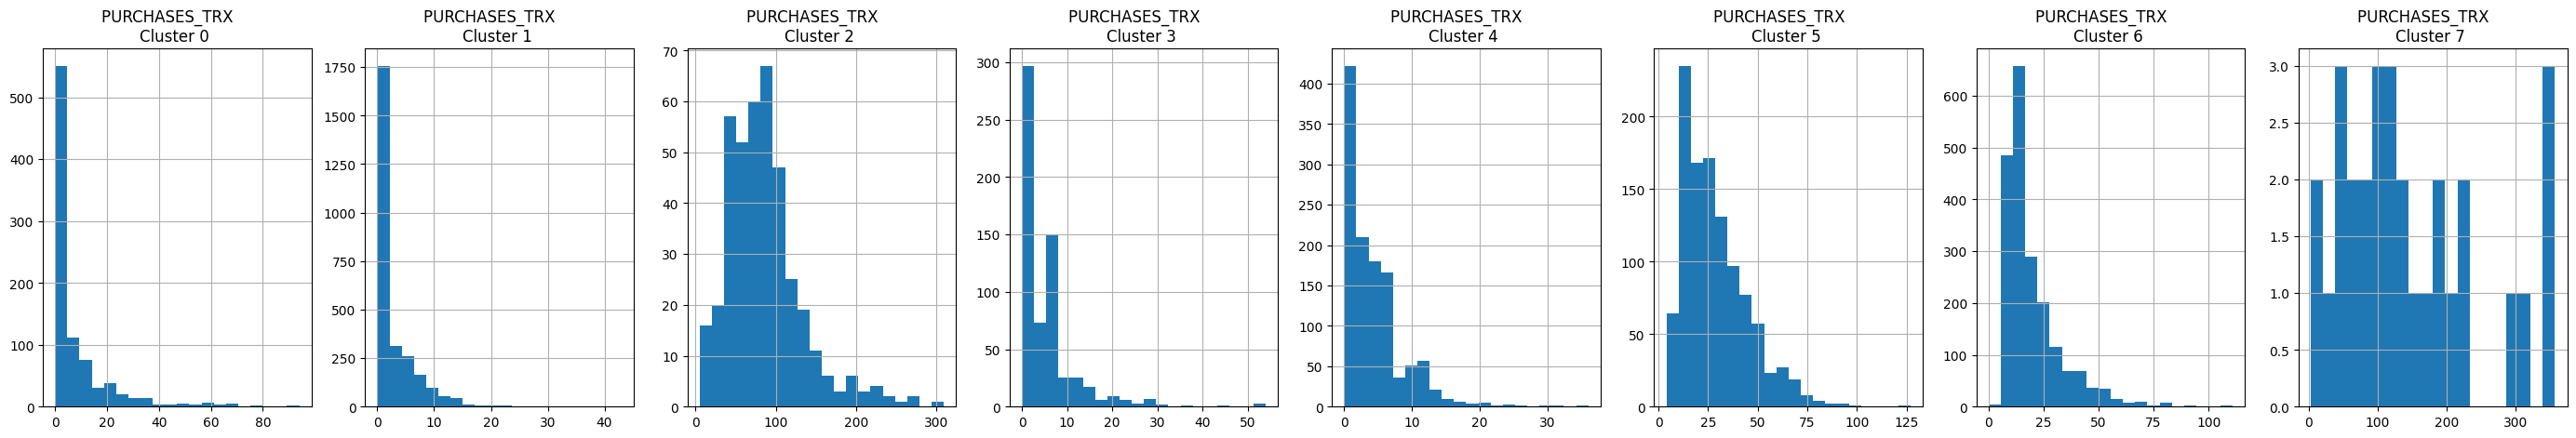

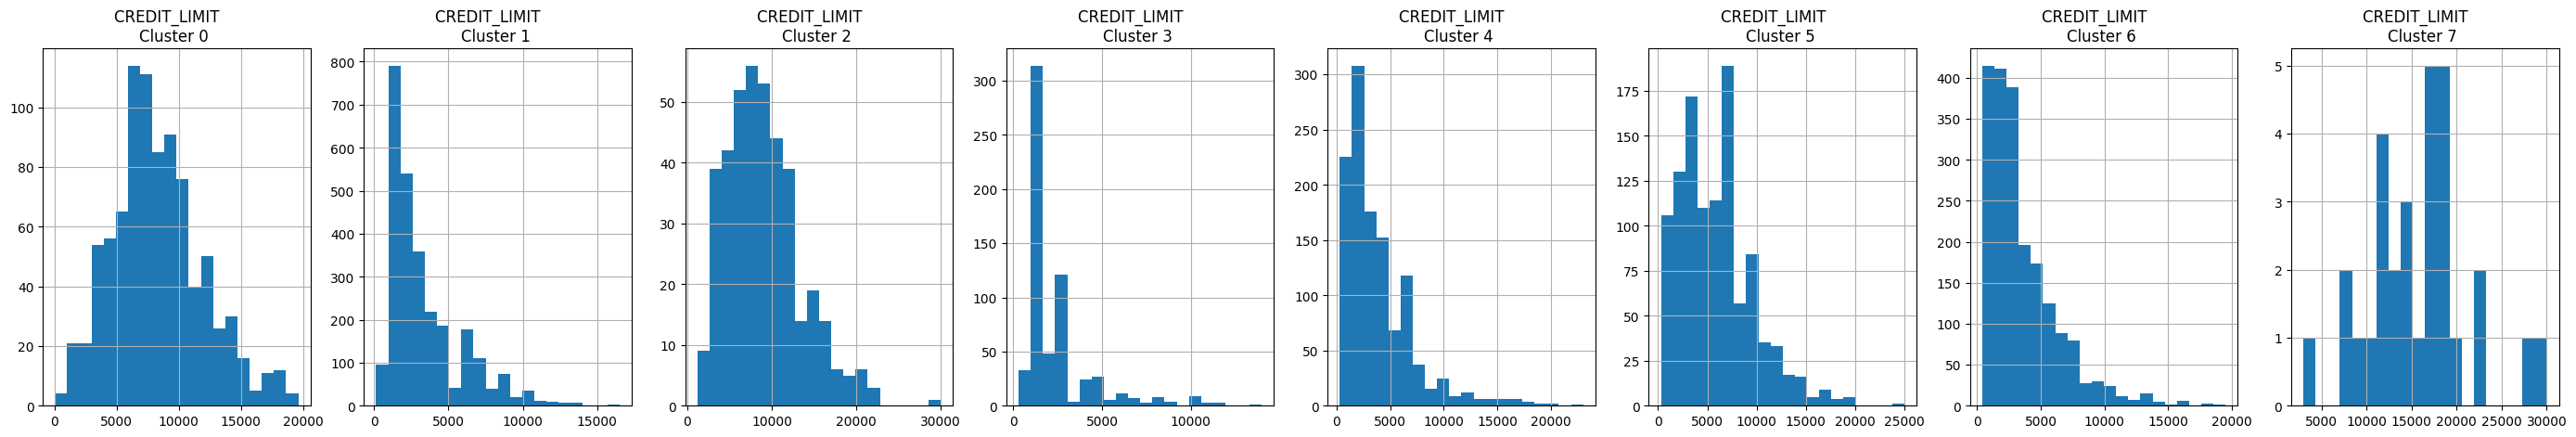

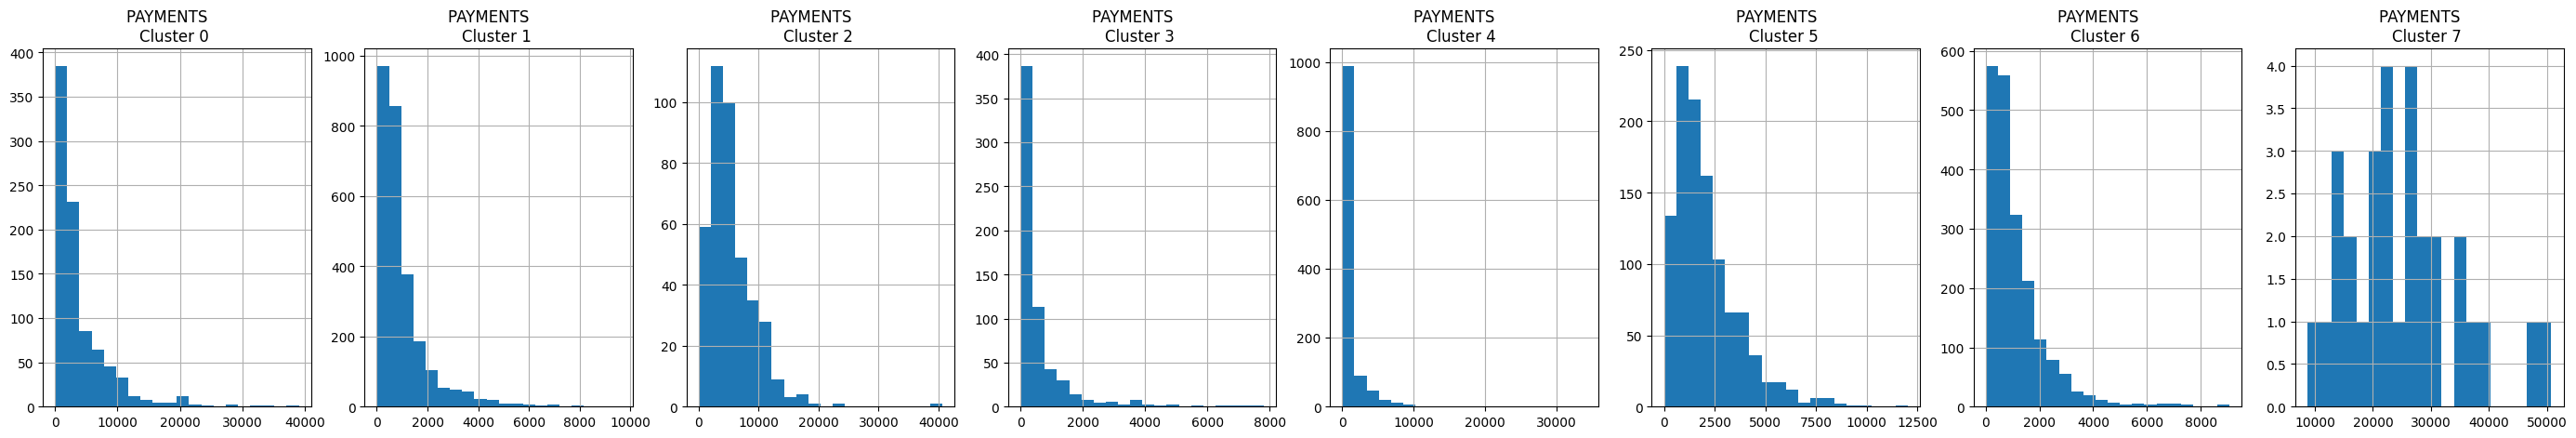

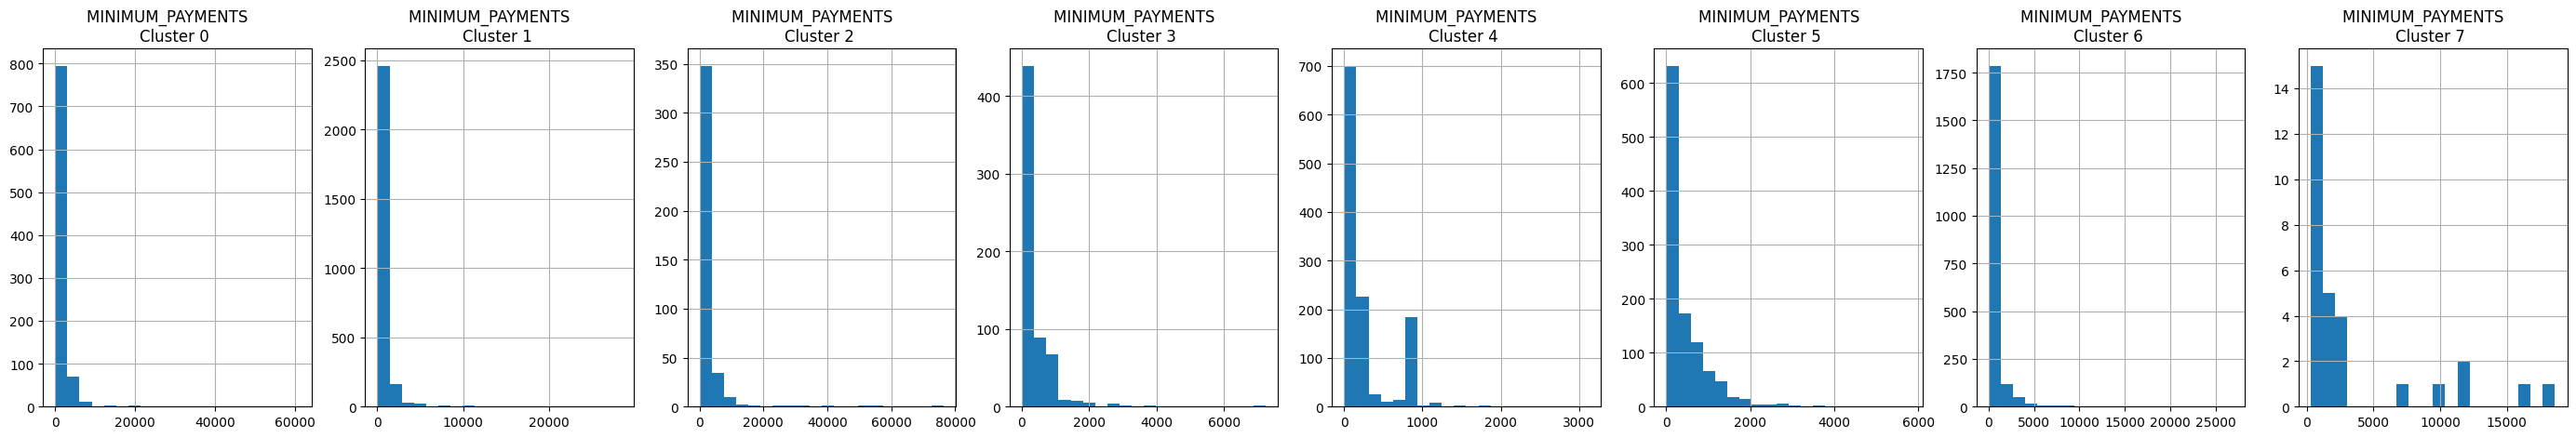

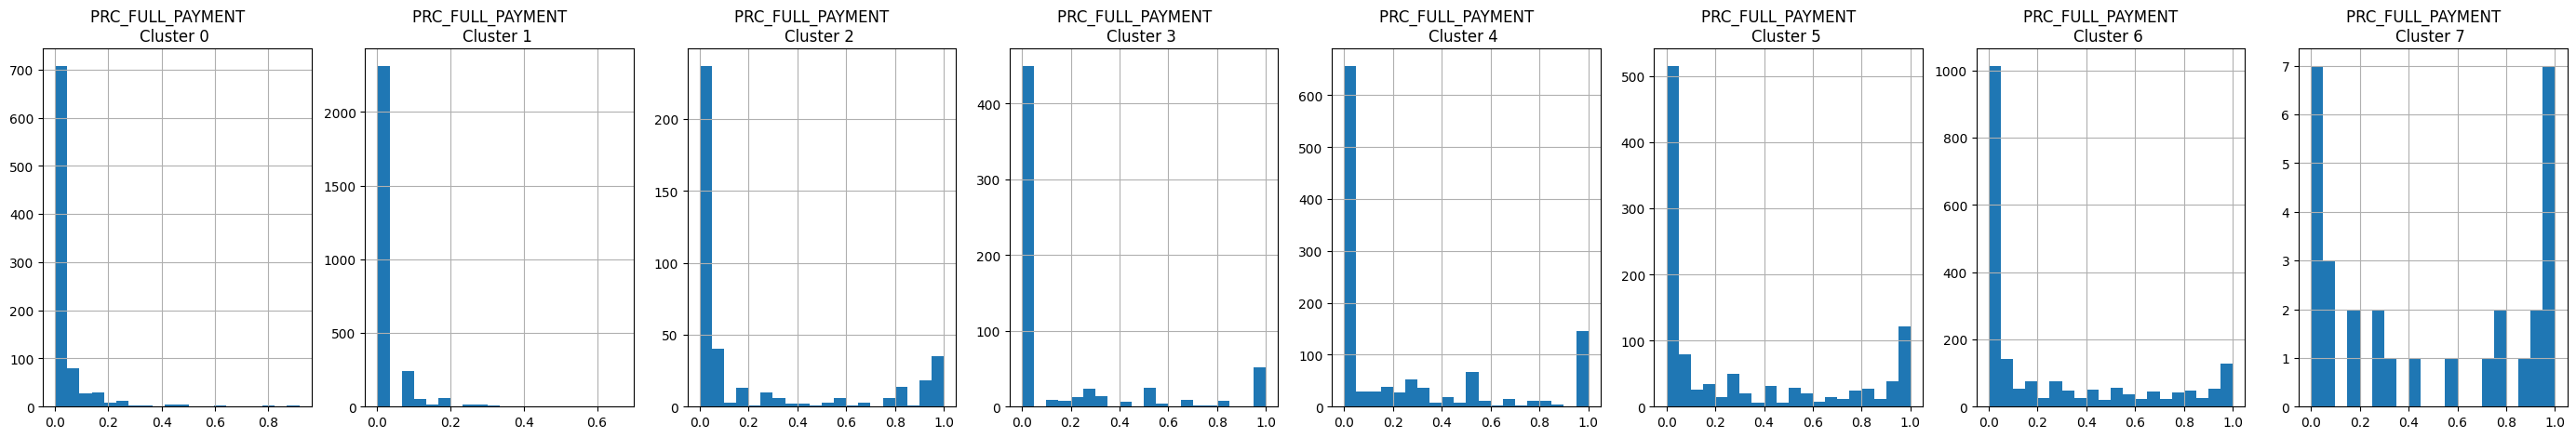

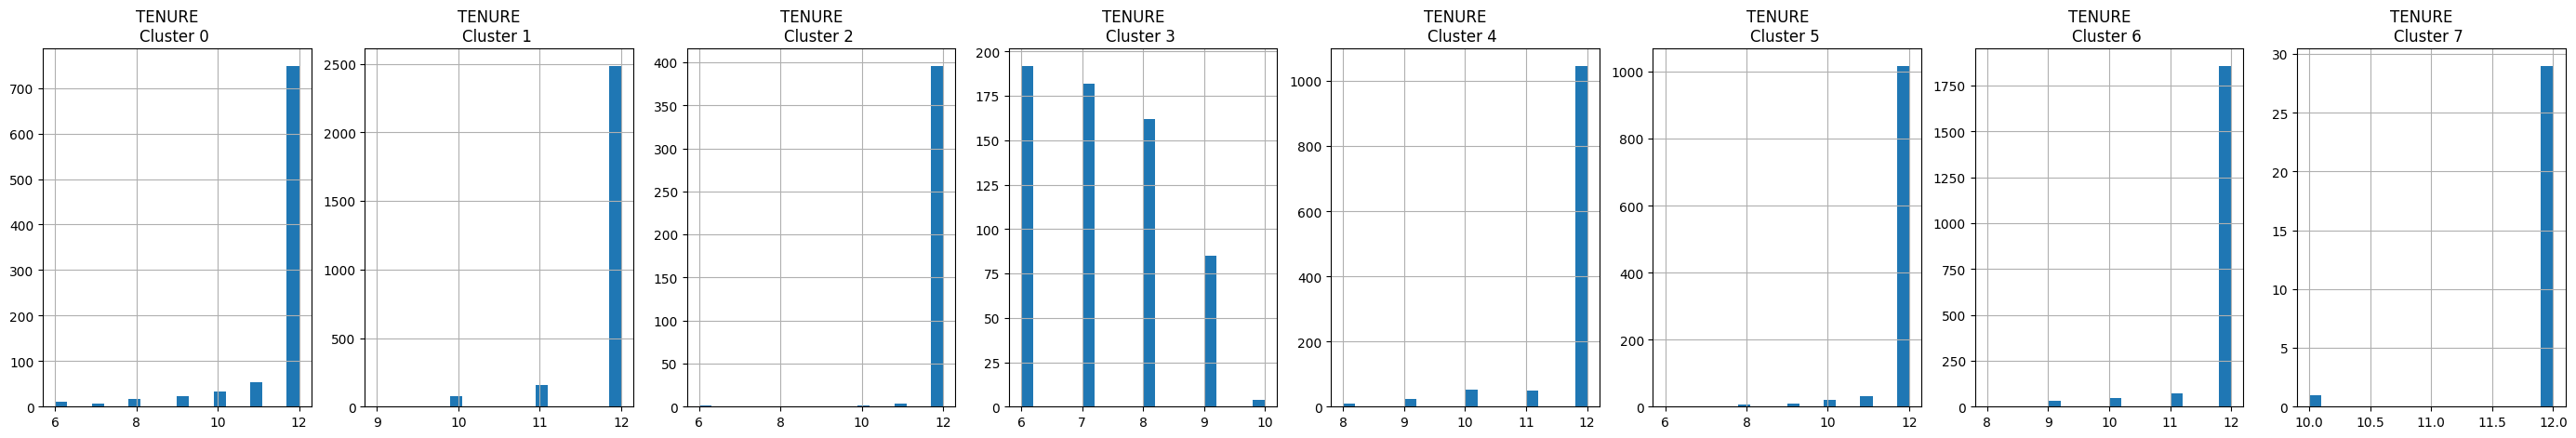

In [36]:
# Plot the histogram of various clusters
for i in creditcard_df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(8):
    plt.subplot(1,8,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))

  plt.show()

# <ins>**APPLY PRINCIPAL COMPONENT ANALYSIS AND VISUALIZE THE RESULTS**

![alt text](https://drive.google.com/uc?id=1xDuvEnbuNqIjX5Zng39TCfGCf-BBDGf0)

In [37]:
# Obtain the principal components


In [38]:
# Create a dataframe with the two components


In [39]:
# Concatenate the clusters labels to the dataframe


# <ins>**UNDERSTAND THE THEORY AND INTUITION BEHIND AUTOENCODERS**

![alt text](https://drive.google.com/uc?id=1g0tWKogvKaCrtsfzjApi6m8yGD3boy4x)

![alt text](https://drive.google.com/uc?id=1AcyUL_F9zAD2--Hmyq9yTkcA9mC6-bwg)

![alt text](https://drive.google.com/uc?id=1xk1D5uldId0DWywRJ3-OAVBcIr5NGCq_)

# <ins>**APPLY AUTOENCODERS (PERFORM DIMENSIONALITY REDUCTION USING AUTOENCODERS)**